In questo file vado ad analizzare tramite PCA la dimensionalità del dataset _semeion.csv_ per andae a trovare il numero ottimale di cluster.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [92]:
# load data
df = pd.read_csv('semeion.csv', sep=' ', usecols=range(0, 256), names=range(0, 256))
# df.head()

In [16]:
# standardizzo i dati ad aver una media di zero e varianza 1
X_std = StandardScaler().fit_transform(df)

In [90]:
# e creo una istanza PCA
pca = PCA(2)
principal_component = pca.fit_transform(X_std)

([<matplotlib.axis.XTick at 0x292897bd0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

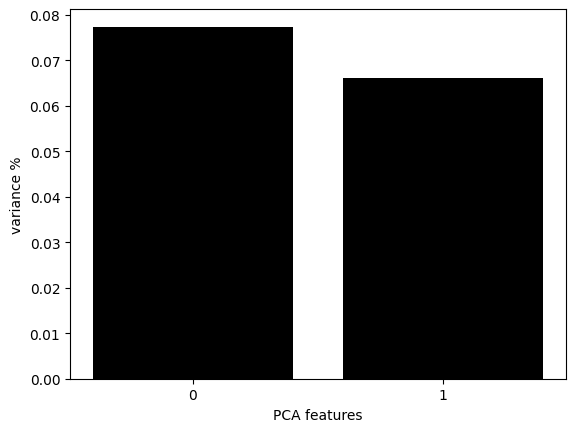

In [91]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

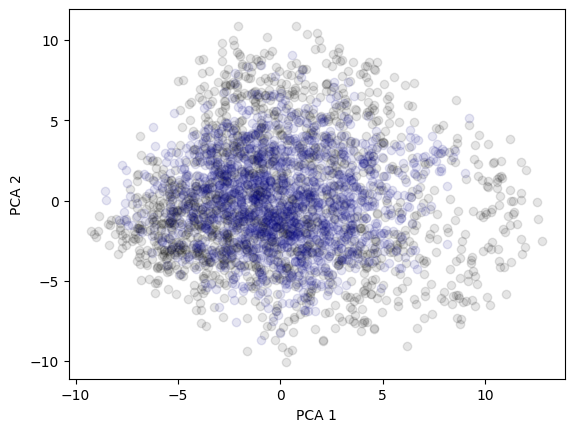

In [85]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principal_component)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.scatter(PCA_components[4], PCA_components[5], alpha=.1, color='navy')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

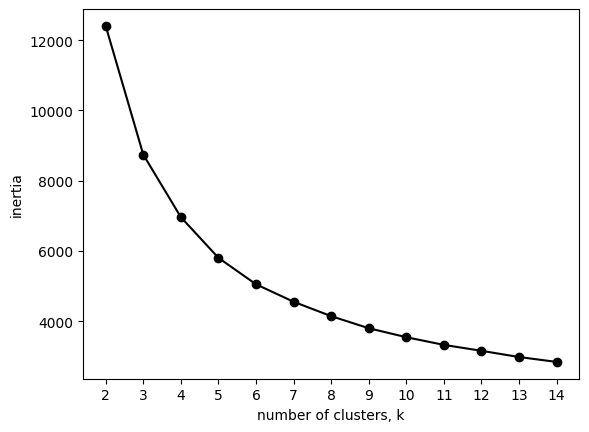

In [67]:
ks = range(2, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [93]:
print(principal_component)

[[ 1.41276335 -4.62425034]
 [10.68262383  1.46037853]
 [ 5.93935929 -5.45383924]
 ...
 [-0.53734312  9.08935473]
 [-0.51131668  2.37013366]
 [-2.36951551 -3.48804396]]
